In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.datasets.samples_generator import make_circles
from mpl_toolkits import mplot3d
import pandas as pd

# Introduction
Support vector machines (SVM) are a particularly powerful and flexible supervised algorithms for both classification and regression.

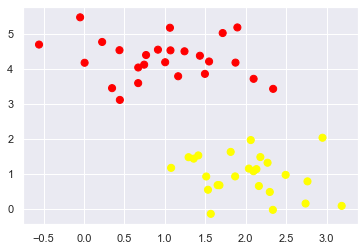

In [2]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

<strong> What is the best linear fitting? </strong>

(-1, 3.5)

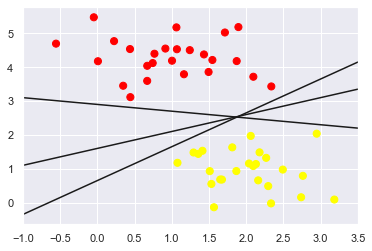

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

By the above figure, we found <strong>at least</strong> 3 different "separators". 
Which one is "the best"?

# Maximize the Margin 

SVM offer one way to improve this: rather than simply drawing a zero-width line between the classes, we can draw around each line a <strong>margin of some width, up to the nearest point.</strong>

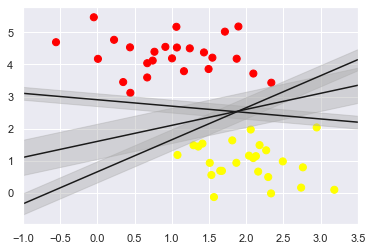

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

<strong>In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.</strong>

# Fitting SVM - Linear Boundries

In [5]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
print("Support Vector Machine:", model.support_vectors_)

Support Vector Machine: [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

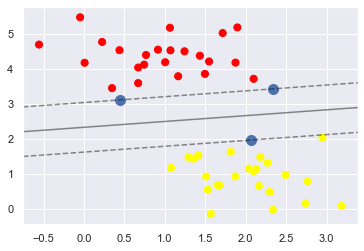

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100)
plot_svc_decision_function(model)

What is the difference from simple linear regression?

# Kernelization

<strong>Kernelization</strong> is preprocessing + math transformation in order to increase / reduce dimensions of your data. <br/>

## The Famous XOR
The logical operator XOR is a really special operator. 

In [8]:
xor_data = pd.DataFrame({
    "X": [0, 0, 1, 1],
    "Y": [0, 1, 0, 1],
    "XOR": [0, 1, 1, 0]
})
xor_data

,X,Y,XOR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


Is XOR data separable?

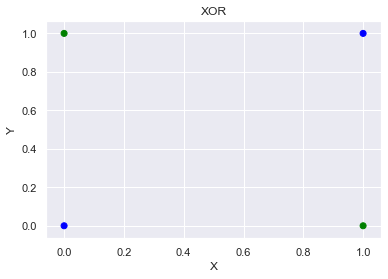

In [9]:
plt.scatter(xor_data["X"], xor_data["Y"], c=["Blue", "Green", "Green", "Blue"])
plt.title("XOR")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

XOR dataset is not linear separable. Let's try kernelization with the following rule: <br/>
We will transform the dataset from $R^2$ to $R^3$,

\begin{equation}
X \leftarrow {X}^2 \\
Y \leftarrow {Y}^2 \\
Z \leftarrow \sqrt{{X^2}+{Y^2}} \\
\end{equation}

In [10]:
xor_data["Z"] = (xor_data["X"]**2 + xor_data["Y"]**2) ** 0.5

Let's check again if this data is linear separable:

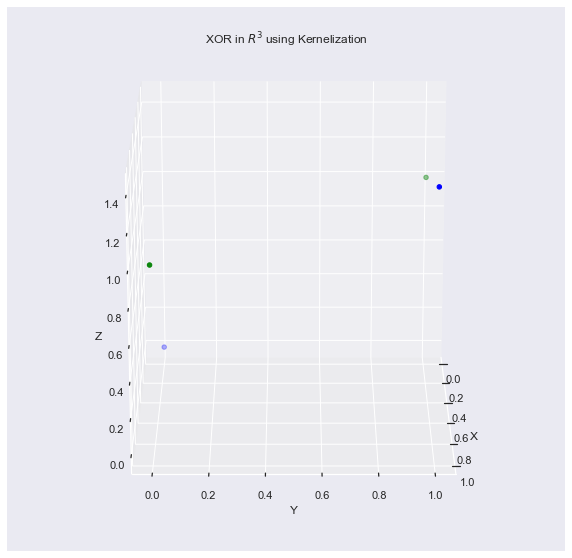

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xor_data["X"], xor_data["Y"], xor_data["Z"], c=["Blue", "Green", "Green", "Blue"])
ax.view_init(20, 0)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("XOR in ${R^3}$ using Kernelization")
plt.show()

# The Advantage of SVM 
## Non Linear Boundries

### Radial Basis Function

SVM becomes extremely powerful is when it is combined with <strong>kernels</strong>. <br/>
Let's create a non-linear data and try to fit it with SVM:

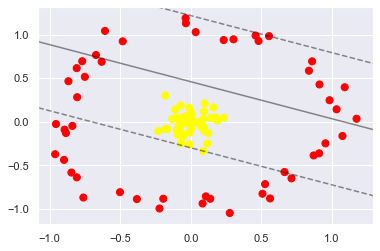

In [8]:
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

We can define a non-linear function and use <strong>Math Transformation</strong> to transform our data. <br/>
Example:

Let X be a non-linear data, then f(x) defined by:
\begin{equation}
f(x) = {e}^{-x^{2}}
\end{equation}

In [9]:
clf = SVC(kernel='rbf', gamma="auto") # rbf = radial basis function = f(x)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

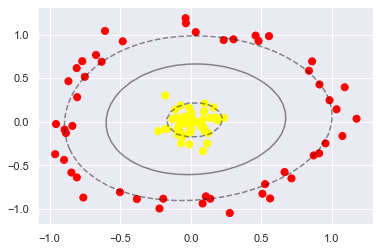

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

<strong>We are insists to create a linear separable. What can we do? </strong>

In [11]:
z = X[:, 0] ** 2 +  X[:, 1] ** 2 # z = x^2 + y^2

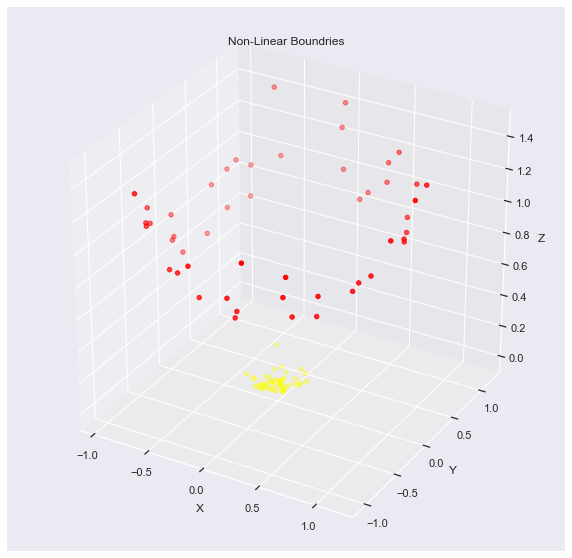

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d') # mishor - surface
ax.scatter(X[:, 0], X[:, 1], z, c=y, cmap='autumn')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Non-Linear Boundries")
plt.show()

<strong>Important Conclusion:</strong> some data may not linear separable in $R^n$ but maybe yes in $R^m$.